In [3]:
import numpy as np
class DataPointGenerator:
    points = None
    def __init__(self, amount_of_points) -> None:
        super().__init__()
        x_values = np.array(np.random.rand(amount_of_points)*20)
        y_values = np.array(np.random.normal(self.get_y(x_values), 4), dtype='int64')
        self.points = np.concatenate((x_values.reshape(amount_of_points, 1),
                        y_values.reshape(amount_of_points, 1)), axis=1)

    def get_y(self, x):
        theta_0 = 5
        theta_1 = 4
        return theta_0 + theta_1 * x

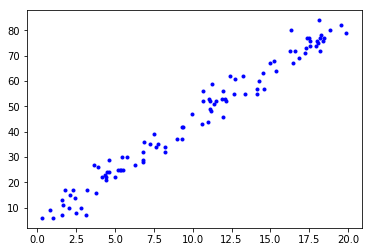

In [4]:
# 1)
#  Erstellen Sie zuerst zum Testen Ihrer Lösung automatische Daten, 
#  d.h. Punkte die auf einer Geraden liegen und deren y-Werte mittels eines gaussverteilten "Rauschen" von idealen Werten abweichen.
#  x und y sollen dabei zwei gleichlange numpy-Arrays sein.
import matplotlib.pyplot as plt

generator = DataPointGenerator(100)
x = generator.points[:, 0]
y = generator.points[:, 1]
plt.plot(x, y, "b.")
plt.show()

In [5]:
# 2)
#   Implementieren Sie die Hypothese (lineares Modell) als Python Funktion:
#       linear_hypothesis(theta_0, theta_1)
#   Die Pythonfunktion soll dabei eine Funktion zurückgeben:
#   >> hypothesis = linear_hypothesis(2., 3.)
#   >> print hypothesis(np.array([1., 2.]))
#   [ 5.  8.]
def linear_hypothesis(theta_0, theta_1):
    def fct(x):
        return theta_0 + theta_1 * x

    return fct


hypothesis = linear_hypothesis(2., 3.)
print(hypothesis(np.array([1., 2.])))

[ 5.  8.]


In [6]:
# 3)
#    Implementieren Sie die Kostenfunktion J als Python Funktion:
#       def cost_function(hypothesis, x, y):

#              TODO

#
#    Die Pythonfunktion soll dabei eine Funktion zurückgeben, die
#    die beiden Parameter theta_0 und theta_1 aufnimmt.
#
#   >> j = cost_function(linear_hypothesis, x, y)
#   >> print j(2.1, 2.9)
#
def cost_function(hypothesis, x, y):
    def fct(theta1, theta2):
        curr_hypothesis = hypothesis(theta1, theta2)
        return 1 / (2 * x.size) * np.sum(np.square(curr_hypothesis(x) - y))

    return fct


j = cost_function(linear_hypothesis, x, y)
print(j(10, 5))

143.165928153


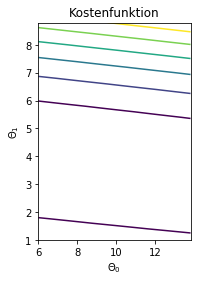

In [7]:
# 4)
#   Plotten Sie die Kostenfunktion in der Umgebung des Minimums als Contourplot.
#   Verwenden Sie hierzu plt.contour(X,Y,Z) und zum Erzeugen des X-Y-Oberflaechengitters meshgrid(..)
ran = 4
a = 10
b = 5
t0 = np.arange(a - ran, a + ran, ran * 0.05)
t1 = np.arange(b - ran, b + ran, ran * 0.05)

C = np.zeros([len(t0),len(t1)])
c = cost_function(linear_hypothesis, x, y)

for i, t_0 in enumerate(t0):
    for j, t_1 in enumerate(t1):
        C[j][i] = c(t_0, t_1)

T0, T1 = np.meshgrid(t0, t1)

plt.subplot(121)
plt.contour(T0, T1, C)
plt.xlabel('$\Theta_0$')
plt.ylabel('$\Theta_1$')
plt.title('Kostenfunktion')
plt.show()

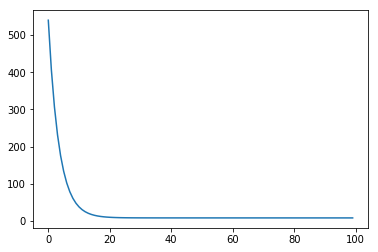

In [8]:
# 5)
#   Implementieren Sie das Gradientenabstiegsverfahren unter Benutzung der Kostenfunktion und der linearen Hypothese.
#  5a) Schreiben Sie eine Funktion die die Update Rules anwendet zur Berechnung der neuen theta-Werte:
#      theta_0, theta_1 = compute_new_theta(x, y, theta_0, theta_1, alpha)
#
#  5b) Wählen Sie Startwerte in der Umgebung des Miniums der Kostenfunktion für theta.
#      Wenden Sie iterativ die compute_new_theta Funktion an und finden Sie so ein Theta mit niedrigen Kosten.
#
#  5c) Plotten Sie den Fortschritt (Verringerung der Kosten über den Iterationen) für 5b
def compute_new_theta(x, y, theta_0, theta_1, alpha):
    hypothesis = linear_hypothesis(theta_0, theta_1)(x)
    theta_0_temp = theta_0 - alpha * 1 / x.size * np.sum(hypothesis - y)
    theta_1_temp = theta_1 - alpha * 1 / x.size * np.sum(np.multiply(hypothesis - y, x))
    return theta_0_temp, theta_1_temp

def train(initial_theta_0, initial_theta_1, alpha, iterations):
    theta_0 = initial_theta_0
    theta_1 = initial_theta_1
    j = cost_function(linear_hypothesis, x, y)
    
    costs = []
    for i in range(iterations):
        theta_0, theta_1 = compute_new_theta(x, y, theta_0, theta_1, alpha)
        costs.append(j(theta_0, theta_1))
    plt.plot(np.arange(0, iterations, 1), costs)
    plt.show()
    return theta_0, theta_1
theta_0_new, theta_1_new = train(8, 7, 0.001, 100)

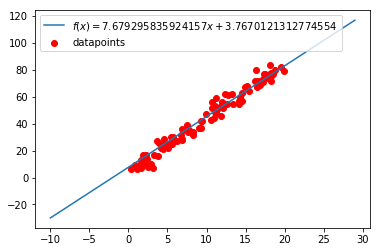

In [10]:
# 6)
#   Plotten Sie das Modell (Fit-Gerade) zusammen mit den Daten.
plt.scatter(x, y, label='datapoints', color="red")
x_new = np.arange(-10, 30, 1)
y_new = theta_0_new + theta_1_new * x_new
plt.plot(x_new, y_new, label='$f(x) = {theta0}x + {theta1}$'.format(theta0=theta_0_new, theta1 = theta_1_new))
plt.legend(loc='best')
plt.show()

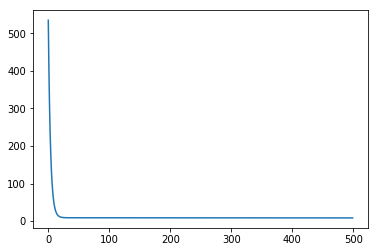

(7.2933508510168918, 3.7788562304224484)

In [11]:
# 7)
#    Trainieren (siehe 5b) für verschiedene Werte der Lernrate und
#    plotten Sie Kosten über den Iterationen in einen Graph.
train(8, 7, 0.001, 500)


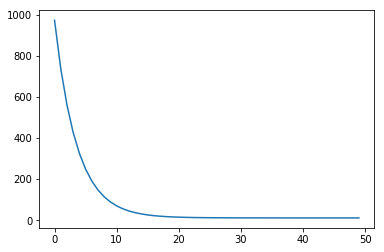

(9.5945797770439754, 3.6093844184308406)

In [12]:
# 7)
#    Trainieren (siehe 5b) für verschiedene Werte der Lernrate und
#    plotten Sie Kosten über den Iterationen in einen Graph.
train(10, 8, 0.001, 50)